# Models optimisation
## Purpose
Because several of the models used in the analysis (see `credit_risk_classification.ipynb`) take several parameters that can influence their performance, this notebook is used to optimise these parameters. The best performing version in then used in the main analysis.

## Preparation

In [1]:
# Ignore all warnings
from warnings import simplefilter
simplefilter(action='ignore')

# Import dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

# Import the models from SKLearn (Model 1 through Model 6)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Local module
from ml_classification import model_performance

# Read the CSV file from the Resources folder into a Pandas DataFrame
csv = Path('Resources/lending_data.csv')
df = pd.read_csv(csv)

# Separate the data into labels and features
# Separate the y variable, the labels
y = df['loan_status']

# Separate the X variable, the features
X = df.drop(columns='loan_status')

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,stratify=y)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

---
## Optimisation of Model 4 (`DecisionTreeClassifier`)
### Analysis
`DecisionTreeClassifier` takes the maximum depth as a parameter. A max_depth parameter between 1 and 10 is tested. The main metric we look at is the Class-1 Recall to make sure that as few risky loans as possible are classified as risky (limit risks for the lender.) 


In [2]:
# Test max depth between 1 and 11
depths = list(range(1,11))

# Create empty list to save results
metrics = []

for depth in depths:

    # Creating the decision tree classifier instance
    model_4 = DecisionTreeClassifier(max_depth=depth)

    # Fitting the model
    model_4 = model_4.fit(X_train_scaled, y_train)

    # Making predictions using the testing data
    predictions_4 = model_4.predict(X_test_scaled)

    # Model performance (do not print the output)
    model_4_metrics = model_performance(y_test, predictions_4, False)

    # Add an element to store the max depth
    model_4_metrics['max_depth'] = depth

    # Add the dictionary to the metrics list
    metrics.append(model_4_metrics)

# Save the metrics to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Reorder the colunms
metrics_df = metrics_df[['max_depth', 'accuracy', 'precision_0', 'precision_1', 'recall_0', 'recall_1']]
metrics_df.sort_values('recall_1', ascending=False)

,max_depth,accuracy,precision_0,precision_1,recall_0,recall_1
2,3,0.995202,0.999839,0.873596,0.995202,0.9952
0,1,0.995099,0.999732,0.873239,0.995202,0.9920
1,2,0.995099,0.999732,0.873239,0.995202,0.9920
3,4,0.995099,0.999732,0.873239,0.995202,0.9920
4,5,0.994996,0.999679,0.871831,0.995149,0.9904
5,6,0.994944,0.999572,0.872702,0.995202,0.9872
6,7,0.994893,0.999518,0.872521,0.995202,0.9856
7,8,0.994893,0.999465,0.873580,0.995256,0.9840
8,9,0.994893,0.999465,0.873580,0.995256,0.9840
9,10,0.994480,0.998983,0.873199,0.995309,0.9696


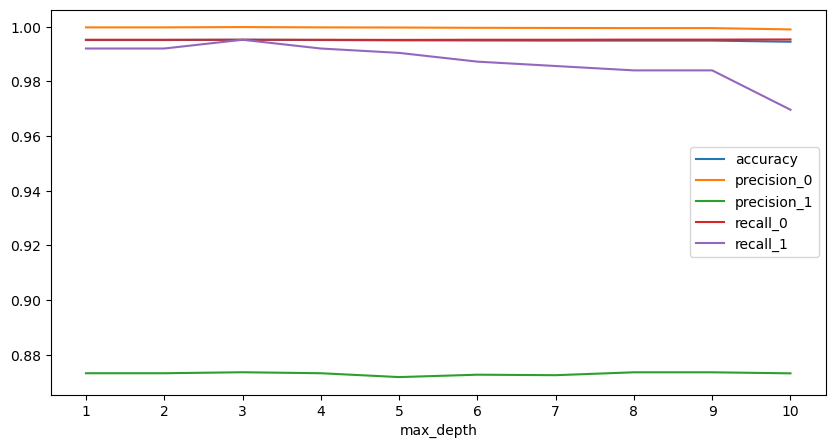

In [3]:
metrics_df.plot.line(x = 'max_depth', figsize = (10,5))
plt.xticks(depths)
plt.show()

### Conclusion
A maximum depth of `3` provides the maximum Class-1 recall and all the parameters are in acceptable range. This parameter is therefore used in the main analysis. 

---
## Optimisation of Model 5 (`RandomForestClassifier`)
### Analysis
`RandomForestClassifier` takes the number of estimators as a parameter. We look at estimators between 100 and 1000 and how it influences the performance of the model.

The main metric we look at is again the Class-1 Recall to make sure that as few risky loans as possible are classified as risky (limit risks for the lender.) 

In [4]:
estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

# Create empty list to save results
metrics = []

for estimator in estimators:
    print(f"Generate forest with {estimator} estimators")

    # Create a random forest classifier
    model_5 = RandomForestClassifier(n_estimators=estimator, random_state=1)

    # Fitting the model
    model_5 = model_5.fit(X_train_scaled, y_train)

    # Making predictions
    predictions_5 = model_5.predict(X_test_scaled)

    # Model performance
    model_5_metrics = model_performance(y_test, predictions_5, False)

    # Add an element to store the max depth
    model_5_metrics['n_estimators'] = estimator

    # Add the dictionary to the metrics list
    metrics.append(model_5_metrics)

# Save the metrics to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Reorder the colunms
metrics_df = metrics_df[['n_estimators', 'accuracy', 'precision_0', 'precision_1', 'recall_0', 'recall_1']]
metrics_df.sort_values('recall_1', ascending=False)

Generate forest with 100 estimators
Generate forest with 200 estimators
Generate forest with 300 estimators
Generate forest with 400 estimators
Generate forest with 500 estimators
Generate forest with 600 estimators
Generate forest with 700 estimators
Generate forest with 800 estimators
Generate forest with 900 estimators
Generate forest with 1000 estimators


,n_estimators,accuracy,precision_0,precision_1,recall_0,recall_1
1,200,0.992262,0.996214,0.875197,0.995789,0.8864
2,300,0.992313,0.996214,0.876582,0.995842,0.8864
3,400,0.992262,0.996214,0.875197,0.995789,0.8864
4,500,0.992210,0.996160,0.875000,0.995789,0.8848
5,600,0.992210,0.996160,0.875000,0.995789,0.8848
6,700,0.992210,0.996160,0.875000,0.995789,0.8848
7,800,0.992210,0.996160,0.875000,0.995789,0.8848
0,100,0.992158,0.996107,0.874802,0.995789,0.8832
8,900,0.992158,0.996107,0.874802,0.995789,0.8832
9,1000,0.992158,0.996107,0.874802,0.995789,0.8832


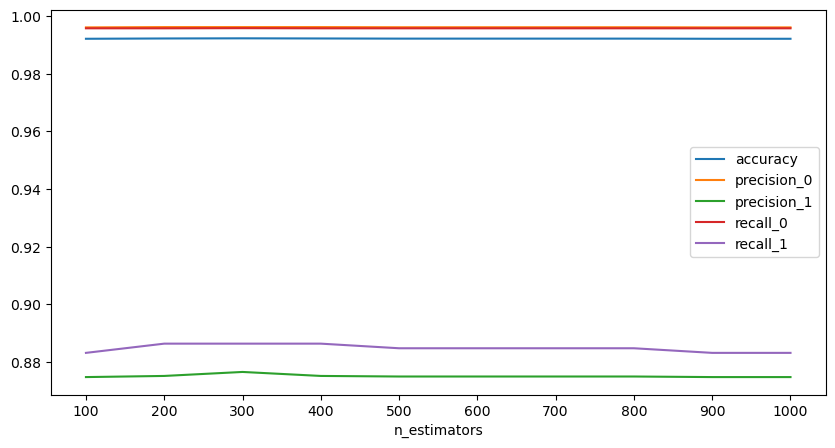

In [5]:
metrics_df.plot.line(x = 'n_estimators', figsize = (10,5))
plt.xticks(estimators)
plt.show()

### Preliminary conclusion
The number of estimators has very little impact on the performance of the model. While 200 estimators shows the highest performance for Class-1 recall, the same model with 300 estimators shows a negligible decrease in recall but a small increase in precision. The precision decreases again for 400 estimators.

Before concluding to use 300 estimators, we look in more details into the performance for the model with a number of estimators between 200 and 400.

In [6]:
estimators = list(range(200,420,20))

# Create empty list to save results
metrics = []

for estimator in estimators:
    print(f"Generate forest with {estimator} estimators")

    # Create a random forest classifier
    model_5 = RandomForestClassifier(n_estimators=estimator, random_state=1)

    # Fitting the model
    model_5 = model_5.fit(X_train_scaled, y_train)

    # Making predictions
    predictions_5 = model_5.predict(X_test_scaled)

    # Model performance
    model_5_metrics = model_performance(y_test, predictions_5, False)

    # Add an element to store the max depth
    model_5_metrics['n_estimators'] = estimator

    # Add the dictionary to the metrics list
    metrics.append(model_5_metrics)

# Save the metrics to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Reorder the colunms
metrics_df = metrics_df[['n_estimators', 'accuracy', 'precision_0', 'precision_1', 'recall_0', 'recall_1']]
metrics_df.sort_values('recall_1', ascending=False)

Generate forest with 200 estimators
Generate forest with 220 estimators
Generate forest with 240 estimators
Generate forest with 260 estimators
Generate forest with 280 estimators
Generate forest with 300 estimators
Generate forest with 320 estimators
Generate forest with 340 estimators
Generate forest with 360 estimators
Generate forest with 380 estimators
Generate forest with 400 estimators


,n_estimators,accuracy,precision_0,precision_1,recall_0,recall_1
0,200,0.992262,0.996214,0.875197,0.995789,0.8864
1,220,0.992313,0.996214,0.876582,0.995842,0.8864
2,240,0.992313,0.996214,0.876582,0.995842,0.8864
3,260,0.992262,0.996214,0.875197,0.995789,0.8864
4,280,0.992313,0.996214,0.876582,0.995842,0.8864
5,300,0.992313,0.996214,0.876582,0.995842,0.8864
6,320,0.992313,0.996214,0.876582,0.995842,0.8864
7,340,0.992262,0.996214,0.875197,0.995789,0.8864
8,360,0.992313,0.996214,0.876582,0.995842,0.8864
9,380,0.992313,0.996214,0.876582,0.995842,0.8864


In [7]:
metrics_df.sort_values('precision_1', ascending=False)

,n_estimators,accuracy,precision_0,precision_1,recall_0,recall_1
1,220,0.992313,0.996214,0.876582,0.995842,0.8864
2,240,0.992313,0.996214,0.876582,0.995842,0.8864
4,280,0.992313,0.996214,0.876582,0.995842,0.8864
5,300,0.992313,0.996214,0.876582,0.995842,0.8864
6,320,0.992313,0.996214,0.876582,0.995842,0.8864
8,360,0.992313,0.996214,0.876582,0.995842,0.8864
9,380,0.992313,0.996214,0.876582,0.995842,0.8864
0,200,0.992262,0.996214,0.875197,0.995789,0.8864
3,260,0.992262,0.996214,0.875197,0.995789,0.8864
7,340,0.992262,0.996214,0.875197,0.995789,0.8864


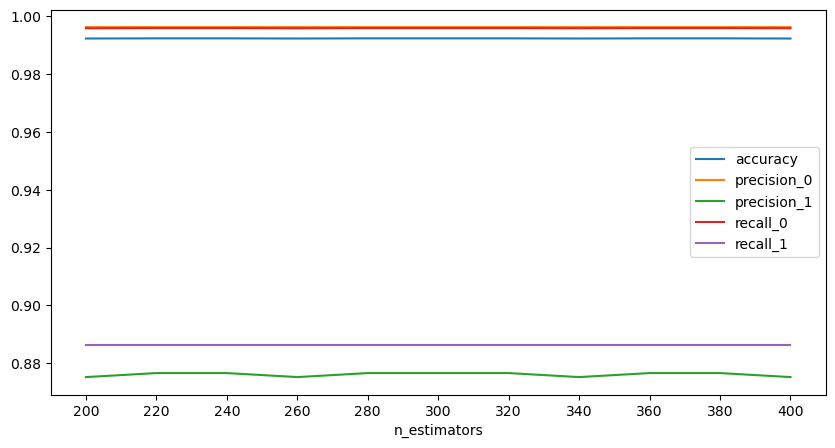

In [8]:
metrics_df.plot.line(x = 'n_estimators', figsize = (10,5))
plt.xticks(estimators)
plt.show()

### Conclusions
A number of 220 estimators is used for the model but the gain in performance is marginal at best and this model is an unlikely candidate for the main analysis.  

---
## Optimisation of Model 6 (`KNeighborsClassifier`)
### Analysis
`KNeighborsClassifier` can use different number of neighbours in the optimisation. The main metric we look at against this number is again the Class-1 Recall to make sure that as few risky loans as possible are classified as risky (limit risks for the lender.) 

In [9]:
# Test max depth between 1 and 15
neighbours = list(range(1,16))

# Create empty list to save results
metrics = []

for neighbour in neighbours:

    # Instantiate the model
    model_6 = KNeighborsClassifier(n_neighbors=neighbour)

    # Train the model
    model_6.fit(X_train_scaled,y_train)

    # Create predictions
    predictions_6 = model_6.predict(X_test_scaled)

    # Model performance
    model_6_metrics = model_performance(y_test, predictions_6, False)

    # Add an element to store the max depth
    model_6_metrics['n_neighbors'] = neighbour

    # Add the dictionary to the metrics list
    metrics.append(model_6_metrics)

# Save the metrics to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Reorder the colunms
metrics_df = metrics_df[['n_neighbors', 'accuracy', 'precision_0', 'precision_1', 'recall_0', 'recall_1']]
metrics_df.sort_values('recall_1', ascending=False)

,n_neighbors,accuracy,precision_0,precision_1,recall_0,recall_1
10,11,0.995099,0.999732,0.873239,0.995202,0.9920
11,12,0.995099,0.999732,0.873239,0.995202,0.9920
12,13,0.995099,0.999732,0.873239,0.995202,0.9920
13,14,0.995099,0.999732,0.873239,0.995202,0.9920
14,15,0.995099,0.999732,0.873239,0.995202,0.9920
8,9,0.994841,0.999411,0.873400,0.995256,0.9824
9,10,0.994635,0.999144,0.873745,0.995309,0.9744
6,7,0.994325,0.998823,0.872648,0.995309,0.9648
4,5,0.994119,0.998663,0.870827,0.995256,0.9600
5,6,0.993655,0.998129,0.870206,0.995309,0.9440


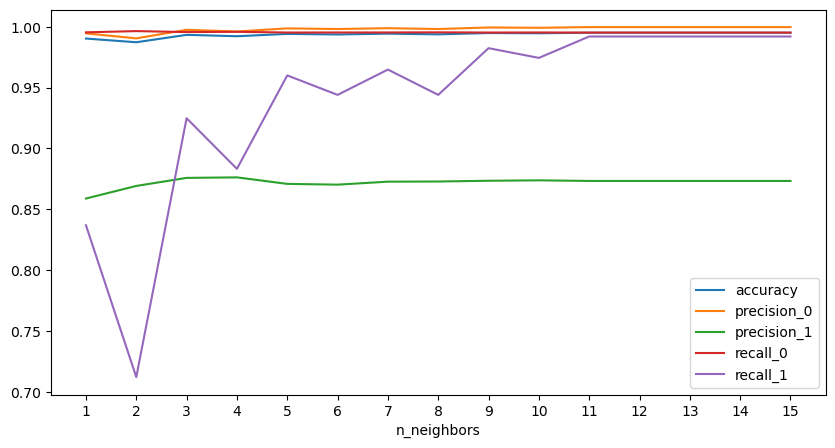

In [10]:
metrics_df.plot.line(x = 'n_neighbors', figsize = (10,5))
plt.xticks(neighbours)
plt.show()

### Conclusion
A number of 11 neighbours are used in the model to maximise the performance.